In [225]:
import pandas as pd
import numpy as np

In [226]:
dataset = pd.read_csv('ion_.csv')
dataset = dataset.dropna()

In [227]:
dataset.head()

,E QSPR,S QSPR,A QSPR,B QSPR,V,L QSPR,MW,Ncharges,C,N,...,RCHO,RCOR,RCOOH,RCOOR,ROR,RCCH,RCN,RINGS,AROMATIC,log RRF
0,0.41,1.05,0.74,1.00,0.7055,3.110,82.0376,0,3,1,...,0,0,1,0,0,0,0,0,0,-3.298432
1,0.35,0.89,0.73,1.00,0.7055,2.966,82.0376,0,3,1,...,0,0,1,0,0,0,0,0,0,-3.225483
2,0.35,1.05,0.74,1.00,0.8464,3.583,94.0483,0,4,1,...,0,0,1,0,0,0,0,0,0,-3.044312
3,0.95,1.09,0.63,1.24,0.9179,4.987,102.0736,0,5,3,...,0,0,0,0,0,0,0,1,1,-2.954677
4,1.78,1.61,1.19,1.32,0.9816,7.180,106.0623,0,4,3,...,0,0,0,0,0,0,0,1,1,-2.950782


In [228]:
X = dataset.iloc[:, 0:27].values
y = dataset.iloc[:, 27].values

In [229]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [230]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [231]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [232]:
#Predictions for Training set
y_pred = regressor.predict(X_train).flatten()

In [233]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 0.05798564581733308
Mean Squared Error: 0.007719930176693201
Root Mean Squared Error: 0.0878631332055328


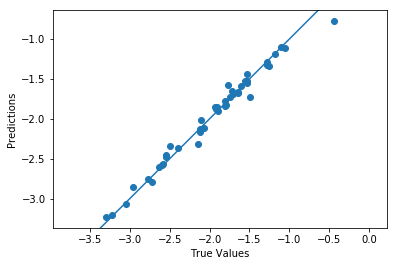

In [234]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

In [235]:
import pandas as pd
df = pd.DataFrame({'predicted_values':y_pred, 'true_values':y_train,})
print(df)

    predicted_values  true_values
0          -2.459702    -2.542118
1          -1.729901    -1.497573
2          -1.670885    -1.647817
3          -1.728458    -1.747147
4          -1.690663    -1.703335
5          -1.651019    -1.718967
6          -1.115338    -1.051587
7          -2.854060    -2.954677
8          -1.667781    -1.645892
9          -1.834011    -1.804100
10         -1.879378    -1.924453
11         -2.114860    -2.074688
12         -2.474264    -2.551294
13         -2.342681    -2.492144
14         -1.526634    -1.525784
15         -0.776628    -0.440093
16         -1.319471    -1.280669
17         -1.533663    -1.533132
18         -2.759559    -2.774691
19         -2.604167    -2.640165
20         -1.586598    -1.609065
21         -2.018130    -2.107349
22         -1.282611    -1.281498
23         -3.207562    -3.225483
24         -1.771424    -1.806875
25         -3.229495    -3.298432
26         -2.311468    -2.143876
27         -1.830488    -1.793174
28         -1.

In [236]:
df.to_csv('forest_plus_tr_5.csv')

In [174]:
#Predictions for testing set
y_pred = regressor.predict(X_test).flatten()

In [175]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1775259099508336
Mean Squared Error: 0.06870059675298208
Root Mean Squared Error: 0.26210798681646863


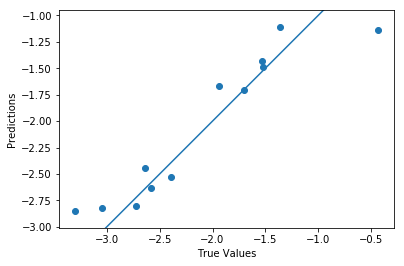

In [146]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

In [147]:
import pandas as pd
df = pd.DataFrame({'predicted_values':y_pred, 'true_values':y_test,})
print(df)

    predicted_values  true_values
0          -1.486703    -1.525784
1          -2.820063    -3.044312
2          -1.114633    -1.358526
3          -2.801326    -2.725842
4          -2.523906    -2.391474
5          -2.442893    -2.640165
6          -1.428054    -1.531653
7          -1.703322    -1.703335
8          -1.666842    -1.935542
9          -2.631304    -2.578396
10         -1.143165    -0.440093
11         -2.847144    -3.298432


In [109]:
df.to_csv('forestplus_ts_5.csv')

In [ ]:
#Predictions for testing set
y_pred = regressor.predict(X_test).flatten()

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

import pandas as pd
df = pd.DataFrame({'predicted_values':y_pred, 'true_values':y_test,})
print(df)

df.to_csv('forestplus_ts_5.csv')